# Podstawy programowania (AD) 2

## Tomasz Rodak

Wykład XII

---

# Iteracje po kolekcjach II

## Wprowadzenie

Algorytmy typu [*brute force*](https://en.wikipedia.org/wiki/Brute-force_search) (*exhaustive search*, wyszukiwanie siłowe, wyszukiwanie wyczerpujące) poszukują rozwiązania problemu przeliczając wszystkie możliwe przypadki. Na przykład funkcja

In [ ]:
def dzielniki(n):
    '''Zwraca listę dzielników n.'''
    lst = []
    d = 1
    
    while d * d < n:
        if n % d == 0:
            lst.extend([d, n // d])

        d += 1
    
    if d * d == n:
        lst.append(d)
    
    return sorted(lst)

In [ ]:
%%time
dzielniki(10**13 + 1)

CPU times: user 947 ms, sys: 3.52 ms, total: 951 ms
Wall time: 1.31 s


[1, 11, 859, 9449, 1058313049, 11641443539, 909090909091, 10000000000001]

poszukuje dzielników `n` po prostu sprawdzając podzielność `n` przez wszystkie liczby naturalne `d`, takie że `d * d <= n`. Algorytm ten byłby jeszcze bardziej siłowy, gdyby sprawdzał podzielność `n` przez wszystkie liczby naturalne `d <= n`. Ale nawet podana wyżej wersja jest siłowa, mimo że dosyć mocno ogranicza wielkość przeszukiwanego zbioru.

Algorytmy siłowe mają wiele zalet:
* często są najprostsze do napisania,
* zawsze w sposób kompletny rozwiązują zadanie,
* są niezawodne i mniej narażone na błędy niż inne, bardziej wymyślne procedury.

Główna wada to problem wydajności czasowej/pamięciowej. Zwykle w algorytmach tego typu czas/pamięć potrzebne do rozwiązania problemu gwałtownie rosną wraz ze wzrostem rozmiaru danych wejściowych. Tym niemniej, ze względu na niebywałą wręcz prędkość z jaką komputery prowadzą obliczenia oraz na ogromną ilość dostępnej pamięci algorytmy siłowe są skuteczne, o ile zakres danych wejściowych nie jest zbyt duży.

W języku Python implementacja rozwiązań siłowych jest szczególnie prosta. Wynika to z dwóch powodów. Po pierwsze w Pythonie funkcje są obiektami pierwszej klasy i dzięki temu jest w nim dostępnych wiele funkcji wyższego rzędu (zob. [wykład](http://math.uni.lodz.pl/~rodakt/dane/analiza_danych/20.21/PPwAD/wyklad_V.html), moduł [functools](https://docs.python.org/3/library/functools.html)). Po drugie, biblioteka standardowa zawiera wiele funkcji zwracających iteratory po rozmaitych obiektach kombinatorycznych (zob. moduł [itertools](https://docs.python.org/3/library/itertools.html)). 


Niżej pokazujemy dwa przykłady z implementacjami *brute force*. Wykorzystujemy funkcje generatora `product()` i `combinations()` z modułu `itertools` oraz funkcję wyższego rzędu `reduce()` z modułu `functools`. Więcej podobnych  narzędzi znajdziesz [tutaj](https://docs.python.org/3/library/functional.html). Szczególnie polecam [recepty modułu itertools](https://docs.python.org/3/library/itertools.html#itertools-recipes).

## Kangur

Zadanie z Kangura 2017, kl II szkoły podstawowej :-)

> *Za każdą literę **A B C D E** wstawiamy liczbę o cztery większą, lub dwa razy większą niż poprzednia. Jeżeli A=1, to która z liczb nigdy nie będzie równa E?*
> 
> *A) 16 B) 17 C) 22 D) 30 E) 36*

Możemy to pytanie rozszerzyć: jak wygląda zbiór wszystkich możliwych wartości E? 

Rozwiązanie wykorzystujące *brute force* oblicza E dla wszystkich możliwych wyborów operacji między literami:
```
A, op1(A) --> B, op2(B) --> C, op3(C) --> D, op4(D) --> E
```
Każda z funkcji `op` w ciągu `(op1, op2, op3, op4)` ma jedną z dwóch możliwych postaci: *powiększ o cztery* lub *pomnóż przez dwa*. Gdy dany jest jeden taki ciąg i ustalona jest wartość A, to E może zostać obliczona. Pojawiają się zatem dwie kwestie: wykonanie iteracji po wszystkich możliwych wyborach `op` i obliczenie E dla zadanego A i ciągu operatorów.

Narzuca się następujące, bezpośrednie rozwiązanie:

In [ ]:
ops = [lambda x: x + 4, lambda x: 2 * x]
A = 1
wyniki = set() # Zbiór jest lepszy niż lista, gdyż nie zawiera powtórzeń.

for op1 in ops:
    for op2 in ops:
        for op3 in ops:
            for op4 in ops:
                E = op4(op3(op2(op1(A))))
                wyniki.add(E)

print(sorted(wyniki))

[12, 14, 16, 17, 18, 20, 22, 24, 26, 28, 36, 40]


Ten program jest prosty i działa zgodnie z oczekiwaniami, nie jest jednak skalowalny - zmiana liczby liter oznacza konieczność usuwania/dopisywania pętli `for`.

Spróbujmy zatem powyższy program uogólnić do funkcji `wartości_końcowe(A, liczba_liter, ops)` zwracającącej posortowaną listę wszystkich wartości końcowych. 

#### Testy

In [ ]:
ops = [lambda x: x + 4]
assert wartości_końcowe(A=1, liczba_liter=1, ops=ops) == [1]
assert wartości_końcowe(A=1, liczba_liter=2, ops=ops) == [5]
assert wartości_końcowe(A=1, liczba_liter=3, ops=ops) == [9]

ops = [lambda x: x + 4, lambda x: 2 * x]
assert wartości_końcowe(A=1, liczba_liter=1, ops=ops) == [1]
assert wartości_końcowe(A=1, liczba_liter=2, ops=ops) == [2, 5]
assert wartości_końcowe(A=1, liczba_liter=3, ops=ops) == [4, 6, 9, 10]
assert wartości_końcowe(A=1, liczba_liter=5, ops=ops) == [12, 14, 16, 17,
                                                          18, 20, 22, 24,
                                                          26, 28, 36, 40]
assert wartości_końcowe(A=10, liczba_liter=2, ops=ops) == [14, 20]
assert wartości_końcowe(A=10, liczba_liter=3, ops=ops) == [18, 24, 28, 40]

Jak to przy rozwiązaniach siłowych, algorytm jest bardzo prosty:
```python
def wartości_końcowe(A, liczba_liter, ops):
    wyniki = set()
    
    for op_seq in <kolekcja z wyborami ciągów operatorów(liczba_liter, ops)>:
        E = <ostatnia wartość ciągu dla zadanego (A, op_seq)>
        wyniki.add(E)
    
    return sorted(wyniki)
```
Obliczenie ostatniej wartości ciągu łatwo wykonać iteracyjnie pętlą `for`, my jednak postąpimy bardziej "funkcyjnie" i wykorzystamy do tego celu funkcję `reduce()` z modułu `functools`:

In [ ]:
from functools import reduce

Zrobimy tak, gdyż w istocie zwykłe rozwiązanie iteracyjne wykorzystuje wzorzec implementowany właśnie przez funkcję `reduce()`. Zgodnie z [dokumentacją](https://docs.python.org/3/library/functools.html) `reduce()` jest równoważna z 
```python
def reduce(function, iterable, initializer=None):
    it = iter(iterable)
    if initializer is None:
        value = next(it)
    else:
        value = initializer
    for element in it:
        value = function(value, element)
    return value
```
Kod źródłowy w module `functools` możesz podejrzeć [tutaj](https://github.com/python/cpython/blob/master/Lib/functools.py). Zwróć uwagę na wykorzystanie funkcji `iter()`. Obiekt `iterable` zostaje zamieniony na iterator `it`, gdyż w wierszu `value = next(it)` pobierana jest pierwsza wartość z `iterable`. Gdyby było wiadomo, że `iterable` jest sekwencją, to wystarczyłoby `value = iterable[0]`. Ponieważ jednak `reduce()` ma działać dla wszystkich obiektów iterowalnych, a nie tylko dla sekwencji, więc dopiero zamiana na iterator pozwala na pobranie pierwszej wartości. Słowo "pierwszej" oznacza tu "takiej, od jakiej zacznie iterację instrukcja `for`". W rzeczywistości kolekcja taka jak zbiór czy słownik nie posiada żadnego "pierwszego" elementu, gdyż nie jest uporządkowana i użytkownik w tym przypadku nie ma kontroli nad kolejnością wartości w iteracji.

Oto kilka przykładów z funkcją `reduce()`.

Obliczanie sumy:

```
1 2 3 4

v = 1

v = f(v, 2) = v + 2 = 1 + 2 = 3
v = f(v, 3) = v + 3 = 3 + 3 = 6
v = f(v, 4) = v + 4 = 6 + 4 = 10
```

In [ ]:
# Suma (w tym przypadku lepsza jest wbudowana funkcja sum())
reduce(lambda x, y: x + y, [1, 2, 3, 4])

10

Iloczyn:

```
1 2 3 4

v = 1
v = f(v, 2) = v * 2 = 1 * 2 = 2
v = f(v, 3) = v * 3 = 2 * 3 = 6
v = f(v, 4) = v * 4 = 6 * 4 = 24
```

Iloczyn ze zmienioną wartością początkową:

```
1 2 3 4

v = 10
v = f(v, 1) = v * 1 = 10 * 1 = 10
v = f(v, 2) = v * 2 = 10 * 2 = 20
v = f(v, 3) = v * 3 = 20 * 3 = 60
v = f(v, 4) = v * 4 = 60 * 4 = 240
```

In [ ]:
# Iloczyn
reduce(lambda x, y: x * y, [1, 2, 3, 4], 10)

240

Kumulatywne wywołania funkcji:

```
+4 *2 *2 +4

v = 1
v = F(v, +4) = +4(1) = 5
v = F(v, *2) = *2(5) = 2 * 5 = 10
v = F(v, *2) = *2(10) = 2 * 10 = 20
v = F(v, +4) = +4(20) = 20 + 4 = 24
```

In [ ]:
# Nasz przypadek
def dodaj4(x):
    return x + 4

def podwój(x):
    return 2 * x

op_seq = [dodaj4, podwój, podwój, dodaj4]
A = 1

# dodaj4(podwój(podwój(dodaj4(A))))
reduce(lambda x, f: f(x), op_seq, A)

24

Zatem funkcja obliczająca ostatnią wartość to po prostu:

In [ ]:
def ostatnia_wartość(A, op_seq):
    return reduce(lambda x, f: f(x), op_seq, A)

Zastanówmy się teraz nad iteracją po wszystkich wyborach operatorów. W
oryginalnym zadaniu mamy cztery pozycje na operator, każdy z operatorów zmienia się niezależnie w zakresie dwóch możliwości. To daje razem $2^4=16$ ciągów wybieranych z [iloczynu kartezjańskiego](https://pl.wikipedia.org/wiki/Iloczyn_kartezja%C5%84ski) czterech jednakowych zbiorów dwuelementowych. Iloczyn kartezjański i szereg innych obiektów kombinatorycznych zdefiniowany jest w module `itertools`:

In [ ]:
from itertools import product

Dokumentację `product()` znajdziesz [tutaj](https://docs.python.org/3/library/itertools.html#itertools.product). Zwróć uwagę, że `product()` jest "leniwy", zwraca iterator i jeśli chcesz obejrzeć jego zawartość, to musisz na nim wykonać (jawną lub nie) iterację.

Oto kilka przykładów:

In [ ]:
# Iloczyn kartezjański `AB` przez siebie
list(product('AB', repeat=2))

[('A', 'A'), ('A', 'B'), ('B', 'A'), ('B', 'B')]

In [ ]:
# Trzykrotny iloczyn kartezjański `AB` przez siebie
list(product('AB', repeat=3))

[('A', 'A', 'A'),
 ('A', 'A', 'B'),
 ('A', 'B', 'A'),
 ('A', 'B', 'B'),
 ('B', 'A', 'A'),
 ('B', 'A', 'B'),
 ('B', 'B', 'A'),
 ('B', 'B', 'B')]

In [ ]:
# Iloczyn kartezjański `AB` przez 'XYZ'
list(product('AB', 'XYZ'))

[('A', 'X'), ('A', 'Y'), ('A', 'Z'), ('B', 'X'), ('B', 'Y'), ('B', 'Z')]

Teraz piętrowe pętle `for` postaci:
```python
for i1 in K1:
    for i2 in K2:
        for i3 in K3:
            <instrukcje>
```
możemy zwinąć do jednej:
```python
for i1, i2, i3 in product(K1, K2, K3):
    <instrukcje>
```
Kod stał się czytelny i skalowalny. Dzięki temu, że `product()` zwraca iterator, nie ma niebezpieczeństwa "wejścia na pamięć".

In [ ]:
def wartości_końcowe(A, liczba_liter, ops):
    wyniki = set()

    for op_seq in product(ops, repeat=liczba_liter - 1):
        E = ostatnia_wartość(A, op_seq)
        wyniki.add(E)

    return sorted(wyniki)

Teraz zamiast zadanie rozwiązywać, możemy ułożyć nowe. Wszystko możemy w nim ustawić: wartość początkową, liczbę liter oraz ilość i rodzaj operacji. O rozkładzie końcowych wartości wiele mówi ich wykres: 

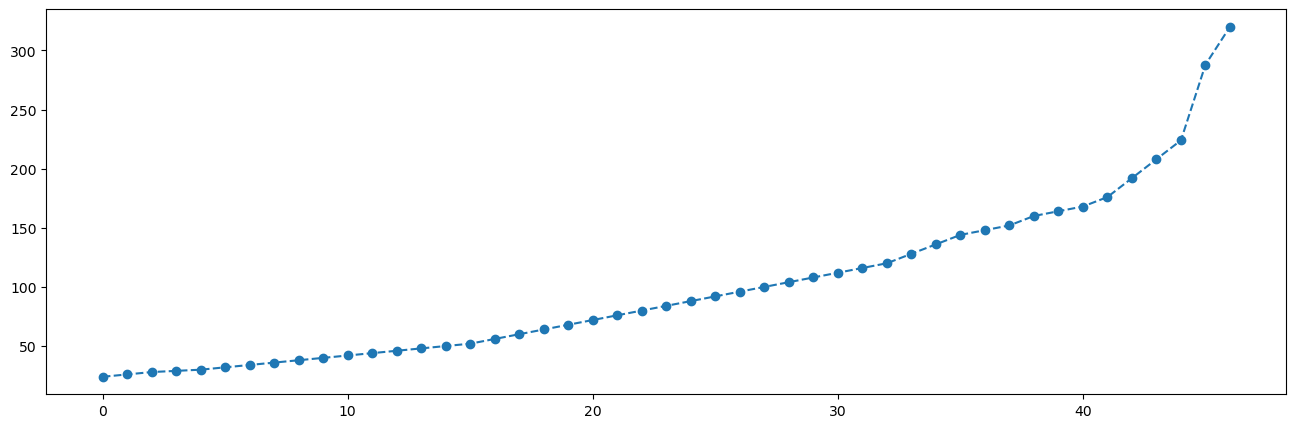

In [ ]:
from matplotlib import pyplot as plt

X = wartości_końcowe(A=1, liczba_liter=8, ops=[dodaj4, podwój])

plt.figure(figsize=(16, 5))
plt.plot(X, ls='--', marker='o')

**Zadanie.**

> *Za każdą literę A1 A2 ... A10 wstawiamy liczbę o jeden większą, o pięć większą lub dwa razy większą niż poprzednia. Jeżeli A1=1, to która z liczb nigdy nie będzie równa A10?*
> 
> *A) 768 B) 769 C) 770 D) 771 E) 772*

### Ciekawostka

Okazuje się, że wydajność iteracji po iteratorze zwróconym przez `product()` jest nieco mniejsza niż iteracji zagnieżdżonymi instrukcjami `for`. Niezbyt rozbudowana dyskusja na ten temat znajduje się [tutaj](https://stackoverflow.com/questions/24555457/itertools-product-slower-than-nested-for-loops).

Pomiar wydajności:

In [ ]:
seq = range(200)

In [ ]:
%%timeit
for i1 in seq:
    for i2 in seq:
        for i3 in seq:
            pass

87.9 ms ± 3.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit
for i1, i2, i3 in product(seq, repeat=3):
    pass

212 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Ścieżka o ekstremalnej sumie

> *Dana jest prostokątna tablica:*
```
5  4  17 13 16 16 16 1  11 17 1  2  5  11 3  
5  15 16 5  14 4  11 2  18 7  13 13 15 5  7  
17 13 5  8  11 15 7  1  5  15 1  10 19 15 16 
8  6  14 12 12 19 2  7  17 2  16 20 12 10 4  
17 10 9  5  9  13 2  17 15 18 12 11 7  19 15 
11 5  3  4  18 12 8  19 13 5  15 11 2  19 2  
14 8  12 10 12 2  13 9  8  15 9  16 7  19 15 
8  1  15 2  1  13 17 8  14 16 19 16 7  16 19 
3  20 15 13 20 3  5  19 15 6  5  19 2  5  13 
16 8  14 18 15 13 3  8  19 1  10 18 10 20 18
```
*Ustawiamy pionek w lewym górnym rogu (na liczbie 5). Pionek porusza sie po polach z liczbami wykonując ruchy "o jedno pole w prawo" lub "o jedno pole w dół". Pionek przemieszcza się w ten sposób od lewego górnego do prawego dolnego rogu, sumując przy tym liczby z pól, przez które przeszedł. Wyznacz maksymalną i minimalną sumę jaką da się w ten sposób uzyskać.*

Rozwiązanie siłowe polega na przejściu wszystkich możliwych ścieżek. Jak je zakodować? Pomyśl o tym w ten sposób. Załóżmy, że tablica ma rozmiar `m` wierszy razy `n` kolumn. Zatem pionek musi wykonać `m - 1` kroków w dół i `n - 1` kroków w prawo. Łącznie `m + n - 2` kroków. Wystarczy przy tym wiedzieć, kiedy porusza się w dół (w prawo), gdyż wówczas podczas kroków pozostałych musi poruszać się w prawo (w dół). W takim razie, jeśli wśród `m + n - 2` kroków wybierzemy jakkolwiek `m - 1` kroków w dół, to automatycznie wybierzemy `n - 1` kroków w prawo (i odwrotnie). Oznaczając kroki numerami `1, 2, ..., m + n - 2` wybór `m - 1` kroków w dół oznacza wybór [kombinacji](https://pl.wikipedia.org/wiki/Kombinacja_bez_powt%C3%B3rze%C5%84) `m - 1` elementowej ze zbioru `m + n - 2` elementowego. Wynika stąd w szczególności, że liczba wszystkich ścieżek jest równa

$$
\binom{m + n -2}{m - 1}
$$

lub, co na jedno wychodzi

$$
\binom{m + n -2}{n - 1}
$$

Przykładowo, w tablicy pionek ma do wykonania 5 kroków:
```
5  4  17 13
5  15 16 5
17 13 5  8
```
Dwuelementowa kombinacja `1, 4` ze zbioru `1, 2, 3, 4, 5` koduje ścieżkę `DPPDP` i sumę 
```
5 + 5 + 15 + 16 + 5 + 8
```
W tym przypadku liczba ścieżek jest równa

$$
\binom{5}{2}=\frac{5!}{2!3!}=\frac{4\cdot 5}{2}=10.
$$

`k` elementowe kombinacje bez powtórzeń z obiektu iterowalnego `it` zwraca funkcja `combinations()` z modułu `itertools`: 

In [ ]:
from itertools import combinations

In [ ]:
list(combinations([1, 2, 3, 4, 5], 2))

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

Wystarczy zatem każdą z takich kombinacji zamienić na ścieżkę i wykonać po niej przejście z sumowaniem wartości. 

Napiszemy funkcję generatora `sumy_z_tablicy(tab)` zwracającą iterator wszystkich sum.

#### Testy

In [ ]:
tab = [[1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 9, 1, 1],
       [1, 1, 1, 1, 1]]

assert sorted(set(sumy_z_tablicy(tab))) == [8, 9, 16, 17]

tab = [[1, 2, 3, 4],
       [4, 3, 2, 1],
       [1, 0, 0, 1]]

assert max(sumy_z_tablicy(tab)) == 12
assert min(sumy_z_tablicy(tab)) == 7

Szkielet funkcji (kroki numerujemy od zera):
```python
def sumy_z_tablicy(tab):
    m, n = <wymiary tablicy>
    
    for komb in combinations(range(m + n - 2), m - 1):
        ścieżka = <ścieżka pochodząca od komb z krokami w dół>
        yield <suma tab wzdłuż ścieżki>
```
Funkcje kodujące ścieżkę i obliczające sumę wzdłuż ścieżki definiujemy osobno:  

In [ ]:
def wyznacz_ścieżkę(m, n, komb):
    return ''.join('D' if k in komb else 'P' for k in range(m + n - 2))

In [ ]:
wyznacz_ścieżkę(3, 4, [0, 3])

'DPPDP'

In [ ]:
def suma_wzdłuż_ścieżki(ścieżka, tab):
    suma = tab[0][0]
    i, j = 0, 0
    
    for kierunek in ścieżka:
        if kierunek == 'D':
            i += 1
        else:
            j += 1
        
        suma += tab[i][j]
    
    return suma

In [ ]:
tab = [[5,  4, 17, 13],
       [5,  15, 16, 5],
       [17, 13, 5,  8]]

suma_wzdłuż_ścieżki('DPPDP', tab)

54

Pora na naszą funkcję:

In [ ]:
def sumy_z_tablicy(tab):
    m, n = len(tab), len(tab[0])

    for komb in combinations(range(m + n - 2), m - 1):
        ścieżka = wyznacz_ścieżkę(m, n, komb)
        yield suma_wzdłuż_ścieżki(ścieżka, tab)

In [ ]:
tab = [[5,  4, 17, 13],
       [5,  15, 16, 5],
       [17, 13, 5,  8]]

list(sumy_z_tablicy(tab))

[53, 51, 54, 54, 50, 53, 53, 55, 55, 52]

In [ ]:
tab = [[1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 9, 1, 1],
       [1, 1, 1, 1, 1]]

lst = list(sumy_z_tablicy(tab))
print(len(lst))
print(sorted(set(lst)))

70
[8, 9, 16, 17]


Pozostało przenieść tablicę do listy i rozwiązać zadanie. Kopiujemy najpierw tablicę do łańcucha (ewentualnie wczytujemy z pliku, gdyby była na dysku):

In [ ]:
tab = '''5  4  17 13 16 16 16 1  11 17 1  2  5  11 3  
5  15 16 5  14 4  11 2  18 7  13 13 15 5  7  
17 13 5  8  11 15 7  1  5  15 1  10 19 15 16 
8  6  14 12 12 19 2  7  17 2  16 20 12 10 4  
17 10 9  5  9  13 2  17 15 18 12 11 7  19 15 
11 5  3  4  18 12 8  19 13 5  15 11 2  19 2  
14 8  12 10 12 2  13 9  8  15 9  16 7  19 15 
8  1  15 2  1  13 17 8  14 16 19 16 7  16 19 
3  20 15 13 20 3  5  19 15 6  5  19 2  5  13 
16 8  14 18 15 13 3  8  19 1  10 18 10 20 18'''

tab = [[int(k) for k in wiersz.split()] for wiersz in tab.splitlines()]
tab

[[5, 4, 17, 13, 16, 16, 16, 1, 11, 17, 1, 2, 5, 11, 3],
 [5, 15, 16, 5, 14, 4, 11, 2, 18, 7, 13, 13, 15, 5, 7],
 [17, 13, 5, 8, 11, 15, 7, 1, 5, 15, 1, 10, 19, 15, 16],
 [8, 6, 14, 12, 12, 19, 2, 7, 17, 2, 16, 20, 12, 10, 4],
 [17, 10, 9, 5, 9, 13, 2, 17, 15, 18, 12, 11, 7, 19, 15],
 [11, 5, 3, 4, 18, 12, 8, 19, 13, 5, 15, 11, 2, 19, 2],
 [14, 8, 12, 10, 12, 2, 13, 9, 8, 15, 9, 16, 7, 19, 15],
 [8, 1, 15, 2, 1, 13, 17, 8, 14, 16, 19, 16, 7, 16, 19],
 [3, 20, 15, 13, 20, 3, 5, 19, 15, 6, 5, 19, 2, 5, 13],
 [16, 8, 14, 18, 15, 13, 3, 8, 19, 1, 10, 18, 10, 20, 18]]

Przy tym rozmiarze tablicy czas pracy zaczyna być zauważalny:

In [ ]:
%%time
max(sumy_z_tablicy(tab))

CPU times: user 4.6 s, sys: 291 µs, total: 4.6 s
Wall time: 4.63 s


338

In [ ]:
%%time
min(sumy_z_tablicy(tab))

CPU times: user 4.66 s, sys: 4.08 ms, total: 4.66 s
Wall time: 4.68 s


197

Liczba ścieżek:

In [ ]:
from math import factorial

m = len(tab)
n = len(tab[0])
# Dzielenie całkowite, gdyż w symbolu Newtona
# mianownik dzieli licznik.
factorial(m + n - 2) // (factorial(m - 1) * factorial(n - 1))

817190

In [ ]:
m, n

(10, 15)

In [ ]:
817190 * (m + n - 2)

18795370

### Tablice o większych rozmiarach

Liczba ścieżek w tablicy o rozmiarze 30x30 jest równa:

In [ ]:
b = factorial(30 + 30 - 2) // (factorial(30 - 1) * factorial(30 - 1))
print(b)
print('{:.2e}'.format(b))

30067266499541040
3.01e+16


W tym przypadku *brute force* nie wystarczy. Algorytm, który potrafi poradzić sobie z takimi i większymi tablicami, to [algorytm Dijkstry](https://pl.wikipedia.org/wiki/Algorytm_Dijkstry).

A może spróbujesz rozwiązać problem [81](https://projecteuler.net/problem=81) z serwisu [Project Euler](https://projecteuler.net/)? :-)